## Exercises:

1. Create a directory named `regression-exercises` within your `codeup-data-science` directory.
1. Initialize this directory as a git repository.
1. Ceate a `README.md` file that outlines the contents.
1. Create a repository on github with the same name (`regression-exercises`) and link your local repo to the remote.
1. Add, commit, and push the readme file.
1. The filename for this exercise is `wrangle.py`.
1. As always, add, commit, and push your work.
---

Throughout the exercises for Regression in Python lessons, you will use the following example scenario:
As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer. 

The first step will be to acquire and prep the data. Do your work for this exercise in a file named `wrangle.py`. 

## 1. Acquire customer_id, monthly_charges, tenure, and total_charges from `telco_churn` database for all customers with a 2 year contract.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import acquire

import warnings
warnings.filterwarnings('ignore')

In [3]:
# use our previously acquire script to get telco churn.
df = acquire.get_telco_data()

In [4]:
# summarize: pull .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           1695 non-null   int64  
 1   contract_type_id          1695 non-null   int64  
 2   internet_service_type_id  1695 non-null   int64  
 3   customer_id               1695 non-null   object 
 4   gender                    1695 non-null   object 
 5   senior_citizen            1695 non-null   int64  
 6   partner                   1695 non-null   object 
 7   dependents                1695 non-null   object 
 8   tenure                    1695 non-null   int64  
 9   phone_service             1695 non-null   object 
 10  multiple_lines            1695 non-null   object 
 11  online_security           1695 non-null   object 
 12  online_backup             1695 non-null   object 
 13  device_protection         1695 non-null   object 
 14  tech_sup

In [5]:
# observe the contract type values with ids to edit our query
df[['contract_type_id', 'contract_type']].head(5)

,contract_type_id,contract_type
0,3,Two year
1,3,Two year
2,3,Two year
3,3,Two year
4,3,Two year


In [6]:
df[['contract_type_id', 'contract_type']].value_counts()

contract_type_id  contract_type
3                 Two year         1695
dtype: int64

In [ ]:
# here, we will go back into our sql query from our acquire script and edit it to meet the requests.
# 
# Note: I am adjusting it to pull down just two-year contracts.
# If we wanted to pull *just* the columns that the problem requested, we would specify those fields in our query rather than SELECT *
# I am choosing to do the column dropping in the prepare portion via pandas, but it could be done either way.
# 

In [7]:
# reassign our dataframe to just the columns requested by the problems
df = df[['customer_id', 'monthly_charges', 'tenure', 'total_charges']]

In [8]:
# summarize: pull .shape
df.shape

(1695, 4)

## 2. Walk through the steps above using your new dataframe. You may handle the missing values however you feel is appropriate. 

In [9]:
# run info

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [11]:
# immediate takeaways:
# 
# total_charges is an object type when it needs to be numerical
# no immediate indicators of null values
# customer_id is not a numtype,
# though it will not impact us as we do not plan on utilizing it as an independent variable
# 

In [12]:
# examine total_charges
df.total_charges.value_counts()

           10
1161.75     2
5682.25     2
5714.2      2
7334.05     2
           ..
6078.75     1
6347.55     1
4903.2      1
7658.3      1
5154.5      1
Name: total_charges, Length: 1678, dtype: int64

In [14]:
# ensure that we dont have any null values
missing = df.isnull().sum()
missing[missing > 0]

In [17]:
# utilize a regex replacement to remove whitespace and replace the whitespace with NaNs
df.total_charges = df.total_charges.replace(r'^\s*$', np.nan, regex=True)

In [18]:
# check that the nulls are present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1685 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [19]:
# check that the nulls are present
missing = df.isnull().sum()
missing[missing > 0]

total_charges    10
dtype: int64

In [20]:
# examine what's going on in the dataframe where the total_charges values are missing.
df[df.total_charges.isnull()]

,customer_id,monthly_charges,tenure,total_charges
98,4075-WKNIU,73.35,0,NaN
114,5709-LVOEQ,80.85,0,NaN
234,2775-SEFEE,61.90,0,NaN
266,4472-LVYGI,52.55,0,NaN
781,2520-SGTTA,20.00,0,NaN
791,3115-CZMZD,20.25,0,NaN
793,3213-VVOLG,25.35,0,NaN
825,4367-NUYAO,25.75,0,NaN
906,7644-OMVMY,19.85,0,NaN
1178,1371-DWPAZ,56.05,0,NaN


In [21]:
df[df.tenure == 1]

,customer_id,monthly_charges,tenure,total_charges
739,1099-GODLO,20.35,1,20.35
928,8559-WNQZS,20.45,1,20.45


In [22]:
df[df.tenure == 2]

,customer_id,monthly_charges,tenure,total_charges
105,4854-SSLTN,59.5,2,130.5


In [ ]:
# 
# takeaway: we can observe that monthly_charges is a rate by the pattern of the first three in the sequence.  We will impute 
# zeros for the missing values.  Because these are the only missing values in our dataframe, we will simply use df.fillna(0)
# 

In [23]:
df = df.fillna(0)

In [24]:
# establish that that operation did what we intended to see
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [25]:
# we still need to convert total_charges to a numerical type, which we will do here.
df['total_charges'] = df['total_charges'].astype('float')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB


In [27]:
# now that everything is numerical:
# summarize: .describe()
df.describe()

,monthly_charges,tenure,total_charges
count,1695.000000,1695.000000,1695.000000
mean,60.770413,56.735103,3706.934336
std,34.678865,18.209363,2579.517834
min,18.400000,0.000000,0.000000
25%,24.025000,48.000000,1269.675000
50%,64.350000,64.000000,3593.800000
75%,90.450000,71.000000,5988.800000
max,118.750000,72.000000,8672.450000


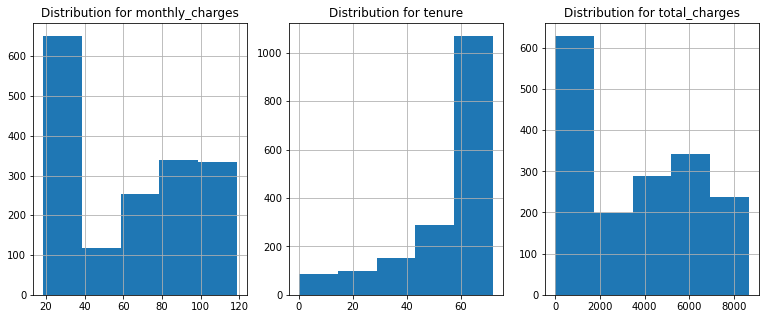

In [31]:
# use subplots to view distribution of all non-id columns
plt.figure(figsize=(13, 5))
for i, col in enumerate(list(df.drop(columns='customer_id').columns)):
    plotnum = i + 1
    plt.subplot(1,3,plotnum)
    plt.title(f'Distribution for {col}')
    df[col].hist(bins=5)

<AxesSubplot:>

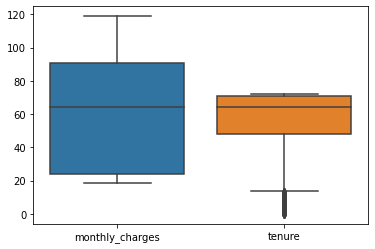

In [34]:
# make two separate box plots for our values, since total_charges is so much different in scale (hint: we will address this better going forward ;) )
sns.boxplot(data=df.drop(columns=['customer_id', 'total_charges']))

<AxesSubplot:>

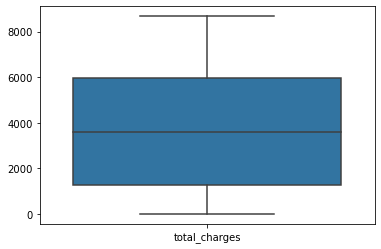

In [35]:
sns.boxplot(data=df[['total_charges']])

## 3. End with a python file wrangle.py that contains the function, `wrangle_telco()`, that will acquire the data and return a dataframe cleaned with no missing values.

In [1]:
import wrangle

In [3]:
train, validate, test = wrangle.wrangle_telco()

In [4]:
train.shape, validate.shape, test.shape

((949, 4), (407, 4), (339, 4))

In [5]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
577,3518-FSTWG,109.55,72,7920.70
1577,3457-PQBYH,20.30,58,1160.75
1647,7515-LODFU,20.30,69,1356.30
1692,9950-MTGYX,20.30,28,487.95
1595,4534-WGCIR,25.15,58,1509.90


In [7]:
train.index = train.customer_id

In [8]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
customer_id,,,,
3518-FSTWG,3518-FSTWG,109.55,72,7920.70
3457-PQBYH,3457-PQBYH,20.30,58,1160.75
7515-LODFU,7515-LODFU,20.30,69,1356.30
9950-MTGYX,9950-MTGYX,20.30,28,487.95
4534-WGCIR,4534-WGCIR,25.15,58,1509.90


In [9]:
train = train.drop(columns='customer_id')

In [10]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
3518-FSTWG,109.55,72,7920.70
3457-PQBYH,20.30,58,1160.75
7515-LODFU,20.30,69,1356.30
9950-MTGYX,20.30,28,487.95
4534-WGCIR,25.15,58,1509.90


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 3518-FSTWG to 3655-SNQYZ
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  949 non-null    float64
 1   tenure           949 non-null    int64  
 2   total_charges    949 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 29.7+ KB


In [ ]:
model.fit(df.drop(columns='customer_id'))